#MLP MODEL WITH 2 HIDDEN LAYERS

Evaluating with Identity Activation:

Accuracy with Identity Activation: 0.870837
Precision: 0.864694
Recall: 0.870837
F1 Score: 0.859346
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     34842
         1.0       0.80      0.51      0.62      9203

    accuracy                           0.87     44045
   macro avg       0.84      0.74      0.77     44045
weighted avg       0.86      0.87      0.86     44045






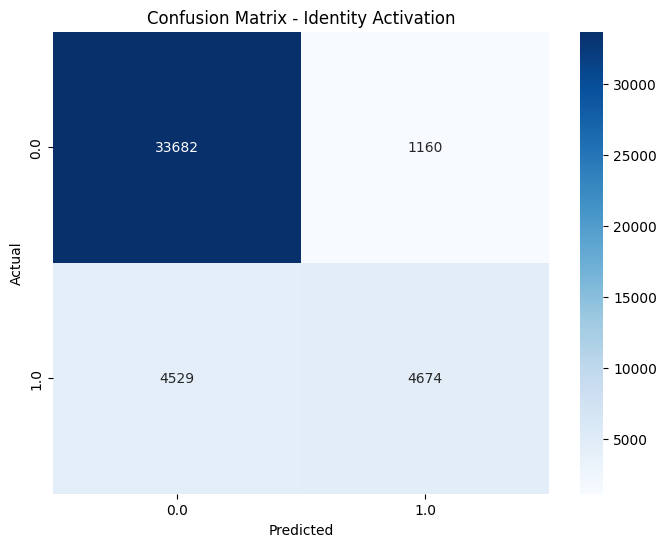

Evaluating with Logistic Activation:

Accuracy with Logistic Activation: 0.998252
Precision: 0.998254
Recall: 0.998252
F1 Score: 0.998252
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34842
         1.0       0.99      1.00      1.00      9203

    accuracy                           1.00     44045
   macro avg       1.00      1.00      1.00     44045
weighted avg       1.00      1.00      1.00     44045






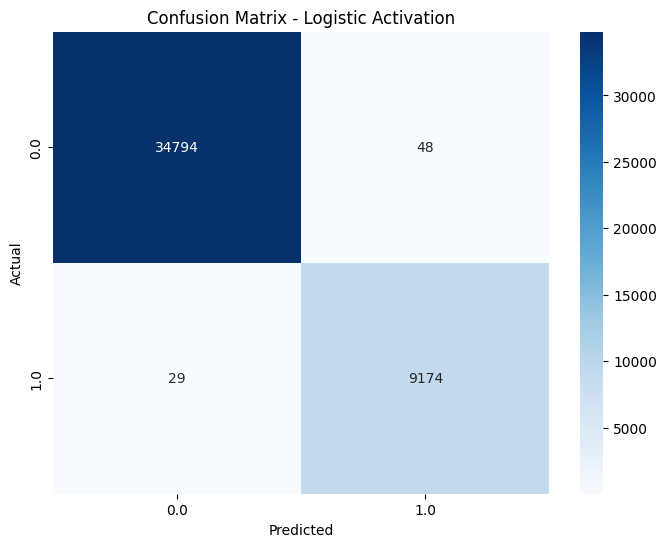

Evaluating with Tanh Activation:

Accuracy with Tanh Activation: 0.999319
Precision: 0.999320
Recall: 0.999319
F1 Score: 0.999319
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34842
         1.0       1.00      1.00      1.00      9203

    accuracy                           1.00     44045
   macro avg       1.00      1.00      1.00     44045
weighted avg       1.00      1.00      1.00     44045






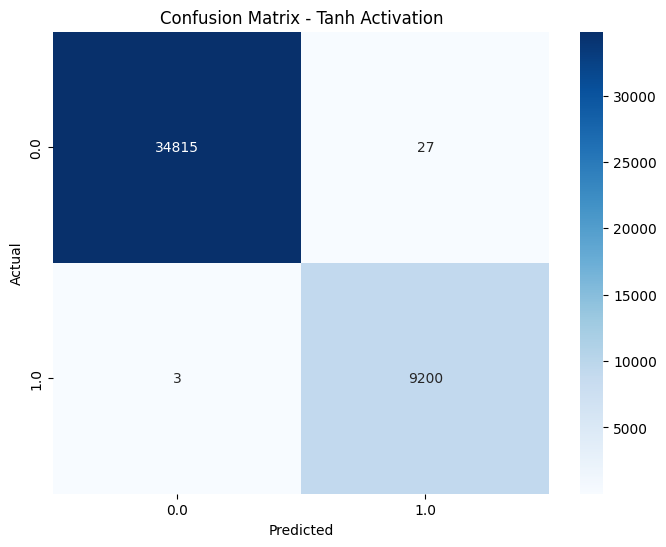

Evaluating with Relu Activation:

Accuracy with Relu Activation: 0.999886
Precision: 0.999886
Recall: 0.999886
F1 Score: 0.999886
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34842
         1.0       1.00      1.00      1.00      9203

    accuracy                           1.00     44045
   macro avg       1.00      1.00      1.00     44045
weighted avg       1.00      1.00      1.00     44045






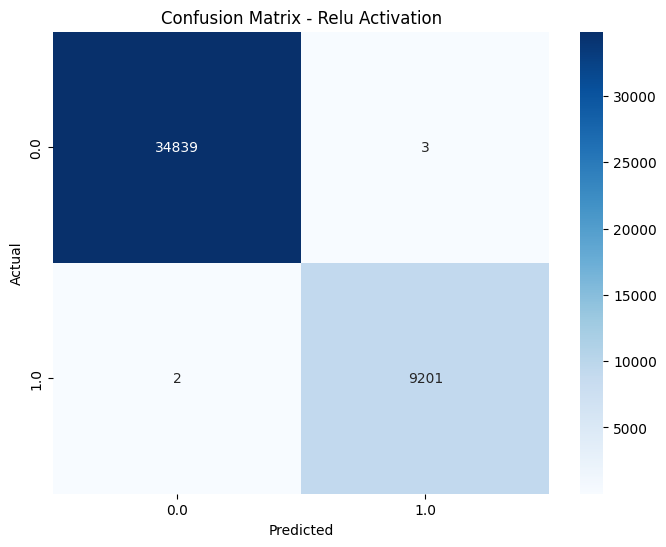

In [16]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score
)
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/ev_data_normalized.csv'
ev_data = pd.read_csv(file_path)

# Separate features (X) and target (y)
X = ev_data.drop(columns=['Electric Vehicle Type'])  # Features
y = ev_data['Electric Vehicle Type']  # Numerical target labels

# Train and Evaluate with MLPClassifier
def train_and_evaluate(activation_function):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=np.random.randint(1000), stratify=y
    )

    # Define MLPClassifier
    mlp = MLPClassifier(
        hidden_layer_sizes=(300, 300),
        activation=activation_function,
        max_iter=300,
        random_state=42
    )

    # Train the model
    mlp.fit(X_train, y_train)

    # Make predictions
    y_pred = mlp.predict(X_test)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Print metrics
    print(f"\nAccuracy with {activation_function.capitalize()} Activation: {accuracy:.6f}")
    print(f"Precision: {precision:.6f}")
    print(f"Recall: {recall:.6f}")
    print(f"F1 Score: {f1:.6f}")
    print("Classification Report:")
    print(report)
    print("\n\n")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=np.unique(y), yticklabels=np.unique(y)
    )
    plt.title(f'Confusion Matrix - {activation_function.capitalize()} Activation')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Test for each activation function
activation_functions = ['identity', 'logistic', 'tanh', 'relu']
for func in activation_functions:
    print(f"Evaluating with {func.capitalize()} Activation:")
    train_and_evaluate(func)
